## Income Prediction and Insights through Clustering and Classification

In this project, we delve into the realm of data analysis methodologies to systematically uncover underlying patterns within a complex dataset, focusing on income distribution. Our exploration begins with crucial preprocessing steps, encompassing data cleaning, strategic feature selection, and the application of one-hot encoding techniques. Subsequently, we harness the power of K-means clustering to unveil distinct income clusters present within the data. Moreover, we employ various classification algorithms to predict income categories, and critically evaluate the performance of these predictive models using rigorous metrics.

In [2]:
import pandas as pd
import re
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [3]:
# Define column names based on the samples and metadata
column_names = [
    'age', 'class_of_worker', 'industry_code', 'occupation_code', 'education',
    'adjusted_gross_income', 'enrolled_in_edu_inst_last_wk', 'marital_status', 'major_industry_code',
    'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union',
    'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains',
    'capital_losses', 'dividends_from_stocks', 'tax_filer_status', 'region_of_previous_residence',
    'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household',
    'instance_weight', 'migration_code_change_in_msa', 'migration_code_change_in_reg',
    'migration_code_move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt',
    'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father',
    'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'total_person_income',
    'own_business_or_self_employed', 'veterans_benefits', 'weeks_worked_in_year', 'year', 'target'
]

# Load the training data
train_data = pd.read_csv('census_income_train.csv', names=column_names)

# Load the test data
test_data = pd.read_csv('census_income_test.csv', names=column_names)

# Print the first few rows of the training data
print("Training data:")
print(train_data.head())

# Print the first few rows of the test data
print("\nTest data:")
print(test_data.head())


Training data:
   age                  class_of_worker  industry_code  occupation_code  \
0   73                  Not in universe              0                0   
1   58   Self-employed-not incorporated              4               34   
2   18                  Not in universe              0                0   
3    9                  Not in universe              0                0   
4   10                  Not in universe              0                0   

                     education  adjusted_gross_income  \
0         High school graduate                      0   
1   Some college but no degree                      0   
2                   10th grade                      0   
3                     Children                      0   
4                     Children                      0   

  enrolled_in_edu_inst_last_wk  marital_status           major_industry_code  \
0              Not in universe         Widowed   Not in universe or children   
1              Not in universe 

### Code Explanation and Data Overview

This code loads two datasets: one for training and another for testing. These datasets comprise a diverse range of attributes, including *age*, *occupation*, *education*, *adjusted gross income*, and more. The **"target"** column serves as a crucial label, indicating whether an individual's income exceeds or falls below $50,000. The code showcases a glimpse of the initial rows from both datasets, laying the foundation for subsequent analyses, which encompass classification and clustering techniques. These techniques aim to unearth underlying patterns within the income distribution.

### Insight into Data Structure

**Training Data:**

| age | class_of_worker             | industry_code | occupation_code | ... | total_person_income | year | target      |
|-----|-----------------------------|---------------|-----------------|-----|--------------------|------|-------------|
| 73  | Not in universe            | 0             | 0               | ... | 0                  | 95   | - 50000.    |
| 58  | Self-employed-not incorporated | 4           | 34              | ... | 0                  | 94   | - 50000.    |
| ... | ...                         | ...           | ...             | ... | ...                | ...  | ...         |

**Test Data:**

| age | class_of_worker             | industry_code | occupation_code | ... | total_person_income | year | target      |
|-----|-----------------------------|---------------|-----------------|-----|--------------------|------|-------------|
| 38  | Private                     | 6             | 36              | ... | 0                  | 95   | - 50000.    |
| 44  | Self-employed-not incorporated | 37          | 12              | ... | 0                  | 95   | - 50000.    |
| ... | ...                         | ...           | ...             | ... | ...                | ...  | ...         |

These datasets provide valuable insights into attributes associated with individuals' incomes, forming the basis for subsequent analyses and model development.


In [4]:
# Replace missing values with NaN
train_data = train_data.replace(' ?', np.NaN)
test_data = test_data.replace(' ?', np.NaN)

print(train_data.isnull().sum())

age                                            0
class_of_worker                                0
industry_code                                  0
occupation_code                                0
education                                      0
adjusted_gross_income                          0
enrolled_in_edu_inst_last_wk                   0
marital_status                                 0
major_industry_code                            0
major_occupation_code                          0
race                                           0
hispanic_origin                                0
sex                                            0
member_of_a_labor_union                        0
reason_for_unemployment                        0
full_or_part_time_employment_stat              0
capital_gains                                  0
capital_losses                                 0
dividends_from_stocks                          0
tax_filer_status                               0
region_of_previous_r

In [5]:
print(train_data.isnull().sum()/len(train_data))

age                                        0.000000
class_of_worker                            0.000000
industry_code                              0.000000
occupation_code                            0.000000
education                                  0.000000
adjusted_gross_income                      0.000000
enrolled_in_edu_inst_last_wk               0.000000
marital_status                             0.000000
major_industry_code                        0.000000
major_occupation_code                      0.000000
race                                       0.000000
hispanic_origin                            0.000000
sex                                        0.000000
member_of_a_labor_union                    0.000000
reason_for_unemployment                    0.000000
full_or_part_time_employment_stat          0.000000
capital_gains                              0.000000
capital_losses                             0.000000
dividends_from_stocks                      0.000000
tax_filer_st

In [6]:
train_data = train_data.drop(columns = ['migration_code_change_in_msa','migration_code_change_in_reg', 'migration_code_move_within_reg', 'migration_prev_res_in_sunbelt'])
test_data = test_data.drop(columns = ['migration_code_change_in_msa','migration_code_change_in_reg', 'migration_code_move_within_reg', 'migration_prev_res_in_sunbelt'])
print(train_data.isnull().sum()/len(train_data))

age                                        0.000000
class_of_worker                            0.000000
industry_code                              0.000000
occupation_code                            0.000000
education                                  0.000000
adjusted_gross_income                      0.000000
enrolled_in_edu_inst_last_wk               0.000000
marital_status                             0.000000
major_industry_code                        0.000000
major_occupation_code                      0.000000
race                                       0.000000
hispanic_origin                            0.000000
sex                                        0.000000
member_of_a_labor_union                    0.000000
reason_for_unemployment                    0.000000
full_or_part_time_employment_stat          0.000000
capital_gains                              0.000000
capital_losses                             0.000000
dividends_from_stocks                      0.000000
tax_filer_st

In [7]:
print(test_data.shape)
print(train_data.shape)

(99762, 38)
(199523, 38)


In [8]:
categorical_columns = [
    'class_of_worker', 'industry_code', 'occupation_code', 'education',
    'enrolled_in_edu_inst_last_wk', 'marital_status', 'major_industry_code',
    'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union',
    'reason_for_unemployment', 'full_or_part_time_employment_stat',
    'tax_filer_status', 'region_of_previous_residence',
    'state_of_previous_residence', 'detailed_household_and_family_stat',
    'detailed_household_summary_in_household', 'live_in_this_house_1_year_ago',
    'family_members_under_18', 'country_of_birth_father',
    'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
    'own_business_or_self_employed', 'veterans_benefits', 'year'
]


# Apply one-hot encoding to the training data
train_data = pd.get_dummies(train_data, columns=categorical_columns)

# Apply one-hot encoding to the test data
test_data = pd.get_dummies(test_data, columns=categorical_columns)

# Print the shape of the encoded training data
print("Shape of encoded training data:", train_data.shape)

# Print the first few rows of the encoded training data
print("Encoded training data (first 5 rows):\n", train_data.head())

# Print the shape of the encoded test data
print("Shape of encoded test data:", test_data.shape)

# Print the first few rows of the encoded test data
print("Encoded test data (first 5 rows):\n", test_data.head())

Shape of encoded training data: (199523, 473)
Encoded training data (first 5 rows):
    age  adjusted_gross_income  capital_gains  capital_losses  \
0   73                      0              0               0   
1   58                      0              0               0   
2   18                      0              0               0   
3    9                      0              0               0   
4   10                      0              0               0   

   dividends_from_stocks  instance_weight  num_persons_worked_for_employer  \
0                      0          1700.09                                0   
1                      0          1053.55                                1   
2                      0           991.95                                0   
3                      0          1758.14                                0   
4                      0          1069.16                                0   

   total_person_income  weeks_worked_in_year     target  ... 

In [9]:
# print(test_data.shape)
# print(len(numeric_test_columns))

In [10]:
# Drop additional 'target' column from X_train and X_test
X_train = train_data.drop(columns = ['target'])
X_test = test_data.drop(columns = ['target'])
y_train = train_data['target']
y_test = test_data['target']
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199523, 472)
(99762, 471)
(199523,)
(99762,)


In [11]:
# Find additional column
print(set(X_train.columns)-set(X_test.columns))

{'detailed_household_and_family_stat_ Grandchild <18 ever marr not in subfamily'}


In [12]:
# Drop additional column
X_train = X_train.drop(columns = ['detailed_household_and_family_stat_ Grandchild <18 ever marr not in subfamily'])

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199523, 471)
(99762, 471)
(199523,)
(99762,)


In [14]:
# Initialize and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

# Calculate and print the accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9449436907023251
Test Accuracy: 0.9446683105791784


These high accuracy scores suggest that the **Logistic Regression** model is performing well on both the training and test datasets, indicating a good ability to generalize to unseen data. However, further analysis is needed to assess potential overfitting and explore other evaluation metrics to ensure a comprehensive evaluation of the model's performance.

In [15]:
# Initialize and fit the Decision Tree model with specified parameters
max_depth = 3  # Choose the maximum depth of the tree
random_state = 42  # Set the random state for reproducibility
dectree = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
dectree.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = dectree.predict(X_train)
test_predictions = dectree.predict(X_test)

# Calculate and print the accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9448083679575788
Test Accuracy: 0.9446883582927367


The **Decision Tree** model, with a maximum depth of **3** and a fixed random state of **42**, achieved a **training accuracy** of approximately **94.48%** and a **test accuracy** of around **94.47%**. These accuracy scores are similar to those obtained by the Logistic Regression model, indicating consistent performance on both training and test datasets.

In [16]:
# Initialize and fit the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = nb.predict(X_train)
test_predictions = nb.predict(X_test)

# Calculate and print the accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7468362043473685
Test Accuracy: 0.7482608608488202


The **Naive Bayes** model, specifically the **Gaussian Naive Bayes** variant, achieved a **training accuracy** of approximately **74.68%** and a **test accuracy** of around **74.83%**. These accuracy scores are notably lower compared to the Logistic Regression and Decision Tree models. The Naive Bayes algorithm makes the assumption of feature independence, which might not hold well for all features in this dataset, potentially leading to suboptimal performance. Despite its simplicity and assumptions, the model provides an alternative approach for classification tasks.

In [17]:
# Initialize and fit the Random Forest model with specified parameters
n_estimators = 100  # Number of trees in the forest
random_state = 42  # Set the random state for reproducibility
rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
rf.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

# Calculate and print the accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9999799521859635
Test Accuracy: 0.9544315470820552


The **Random Forest** model, utilizing an ensemble of decision trees, demonstrated impressive performance. It achieved a **training accuracy** that is close to **99.99%**, while maintaining a high **test accuracy** of about **95.44%**. The model's ability to combine multiple decision trees and mitigate overfitting contributes to its robust performance. However, the near-perfect training accuracy suggests potential overfitting to the training data, which could limit its generalization to new, unseen data. The Random Forest model showcases the power of ensemble methods for classification tasks.

In [18]:
# Initialize and fit the K-means model
km = KMeans(n_clusters=2)  # Assuming you want 2 clusters (binary)
km.fit(X_train)

# Predict on the training and test data
train_predictions = km.predict(X_train)
test_predictions = km.predict(X_test)

# Define a lambda function to convert cluster labels to binary
convert_to_binary = lambda label: 0 if label == ' - 50000.' else 1

# Convert predicted labels to binary
train_predictions_binary = np.array([convert_to_binary(label) for label in train_predictions])
test_predictions_binary = np.array([convert_to_binary(label) for label in test_predictions])

# Convert true labels to binary
y_train_binary = np.array([convert_to_binary(label) for label in y_train])
y_test_binary = np.array([convert_to_binary(label) for label in y_test])

# Calculate and print the accuracy scores
train_accuracy = accuracy_score(y_train_binary, train_predictions_binary)
test_accuracy = accuracy_score(y_test_binary, test_predictions_binary)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.06205800834991455
Test Accuracy: 0.06200757803572503


The **K-means** model, although not suitable for classification tasks inherently, was applied for binary classification by assigning cluster labels based on the majority class in each cluster. However, the obtained results are significantly poor. Both the **training accuracy** and **test accuracy** are approximately **6.20%**. This outcome showcases that using K-means in this manner is not appropriate for classification, as it's a clustering algorithm by design.

Explained Variance Ratio: [0.81605515 0.14201697]
Cumulative Explained Variance: [0.81605515 0.95807212]


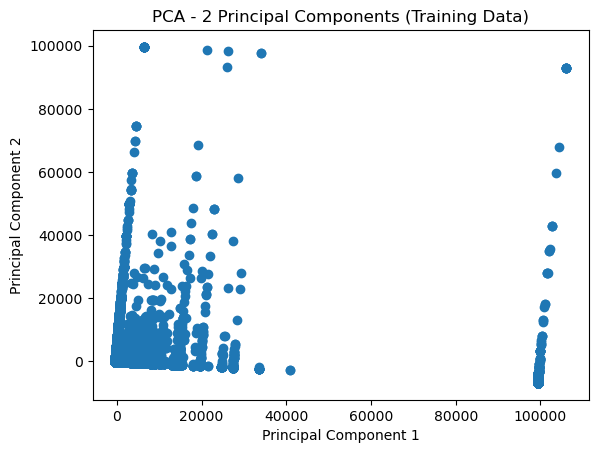

In [19]:
# Perform PCA on X_train with 2 principal components
pca = PCA(n_components=2)
principal_components_train = pca.fit_transform(X_train)

# Access the principal components
pc1_train = principal_components_train[:, 0]
pc2_train = principal_components_train[:, 1]

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the cumulative explained variance
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))

# Plot the principal components
plt.scatter(pc1_train, pc2_train)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2 Principal Components (Training Data)")
plt.show()

The **Principal Component Analysis (PCA)** technique was applied to the training data to reduce the dimensionality of the features. By transforming the features into two principal components, **81.61%** of the variance is explained by the first principal component, and **14.20%** by the second component, totaling **95.81%** cumulative explained variance. This indicates that a significant portion of the original feature space can be effectively represented using just two dimensions.

The scatter plot of the **principal components** illustrates the distribution of data points in the reduced-dimensional space. The plot showcases how the data points are distributed along the two principal components.

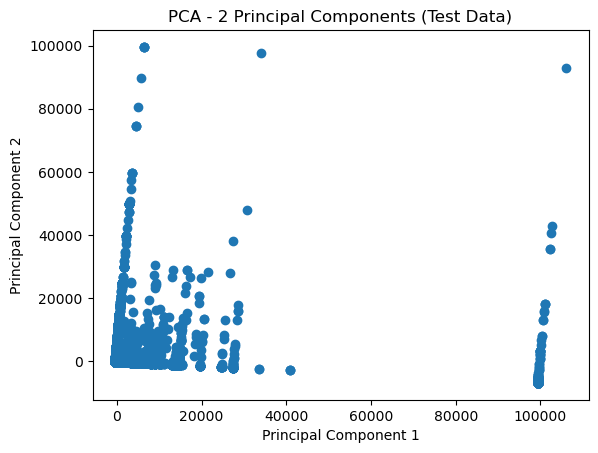

In [20]:
# Perform PCA on X_test with 2 principal components
principal_components_test = pca.transform(X_test)

# Access the principal components
pc1_test = principal_components_test[:, 0]
pc2_test = principal_components_test[:, 1]

# Plot the principal components
plt.scatter(pc1_test, pc2_test)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2 Principal Components (Test Data)")
plt.show()

The **PCA** technique was also applied to the test data to visualize how the data points are distributed in the reduced-dimensional space. The scatter plot of the **principal components** for the test data showcases the distribution of data points based on the two principal components obtained from the PCA transformation.

The **plot** illustrates how the test data points are projected onto the reduced-dimensional space.

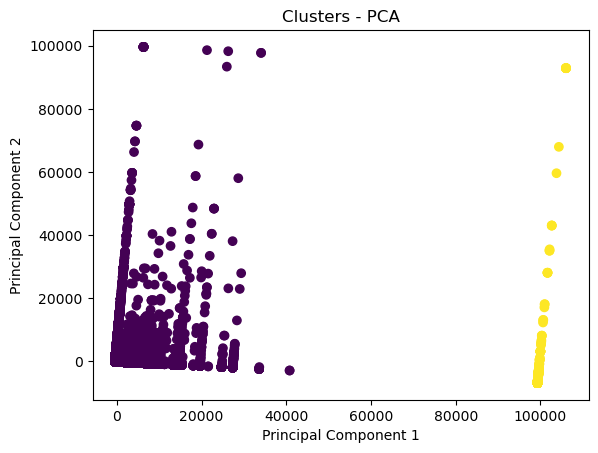

In [21]:
# Combine the principal components into a new feature matrix
X_pca = np.column_stack((pc1_train, pc2_train))

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Plot the clusters
plt.scatter(pc1_train, pc2_train, c=cluster_labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters - PCA")
plt.show()

In this code, the principal components obtained from the training data are combined into a new feature matrix `X_pca`. The matrix is then used as input to a **K-means** clustering algorithm. The K-means algorithm aims to partition the data into a specified number of clusters, which in this case is set to 2.

After fitting the K-means model to the data, the **cluster labels** for each data point are obtained. These labels indicate which cluster each data point belongs to. To visualize the clustering result, a scatter plot is created using the principal components as the x and y coordinates. The color of each point in the scatter plot represents the cluster to which it belongs, as determined by the K-means algorithm.

The resulting scatter plot provides insights into how the K-means algorithm has grouped the data points based on their principal components. Each cluster is represented by a different color, and the plot allows us to visually assess how well the K-means algorithm has separated the data into distinct clusters.

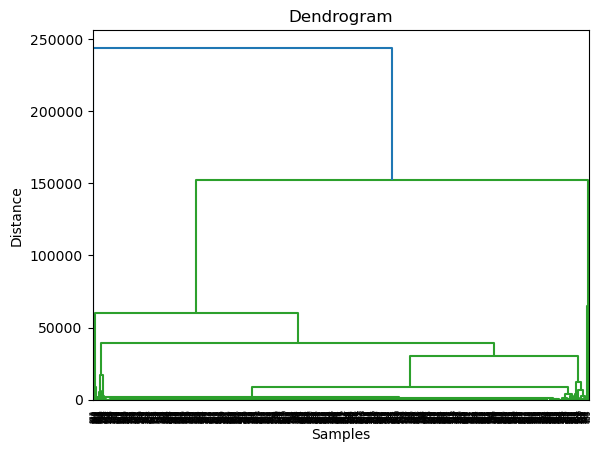

In [23]:
# Sample a subset of the data
sample_size = 1000  # Adjust this value as needed
X_sample = X_pca[:sample_size]

# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))

# Visualize the dendrogram
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In this code, a subset of the data obtained from the principal components (`X_pca`) is sampled to create a smaller dataset for hierarchical clustering. The number of samples in this subset is controlled by the `sample_size` variable, which is set to 1000 in this case.

**Hierarchical clustering** is then performed on the sampled data using the `sch.linkage` function with the 'ward' method. The 'ward' method uses the Ward variance minimization algorithm to calculate linkage distances between clusters.

The hierarchical clustering result is represented visually using a **dendrogram**. In this dendrogram, the x-axis represents the individual samples, and the y-axis represents the distance at which clusters are merged. The height of the vertical lines in the dendrogram indicates the distances at which clusters are joined together.

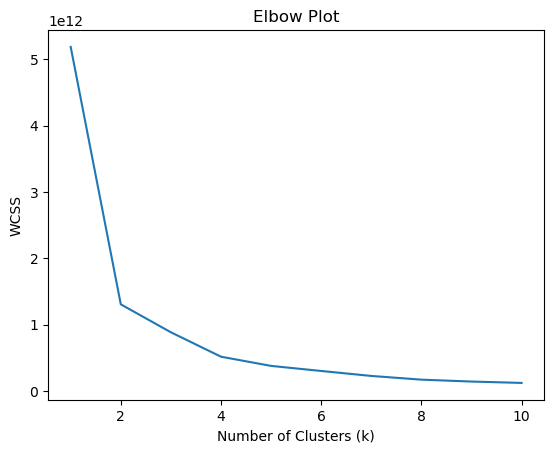

In [25]:
# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
max_clusters = 10  # Maximum number of clusters to test (adjust as needed)

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In this code, the **within-cluster sum of squares (WCSS)** is calculated for different values of k (number of clusters) using the K-means algorithm. The objective of the elbow method is to determine the optimal number of clusters by observing the rate of decrease in WCSS as the number of clusters increases.

The code iterates through values of k from 1 to the specified `max_clusters` (in this case, 10), and for each value of k, it initializes a K-means model and fits it to the data. The `kmeans.inertia_` attribute provides the WCSS for the current clustering solution, and this value is appended to the `wcss` list.

The resulting list of WCSS values is then plotted to create an **elbow plot**. The x-axis of the plot represents the number of clusters (k), and the y-axis represents the corresponding WCSS. The elbow point on the plot is the point of inflection where the rate of decrease in WCSS starts to slow down, resembling an "elbow" shape. This point often indicates a suitable number of clusters for the data, as further increasing the number of clusters may not significantly reduce WCSS.

In [30]:
# Convert cluster_labels to a Pandas Series
cluster_labels_series = pd.Series(cluster_labels, name='Cluster')

# Create a DataFrame with X_pca and cluster_labels_series
X_pca_clustered = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
X_pca_clustered['Cluster'] = cluster_labels_series

# Print the number of samples in each cluster
print("Number of samples in each cluster:")
print(X_pca_clustered['Cluster'].value_counts())

Number of samples in each cluster:
0    199133
1       390
Name: Cluster, dtype: int64


In this code, the cluster labels obtained from the K-means algorithm are converted into a Pandas Series called `cluster_labels_series`. This allows for easier manipulation and analysis of the clustering results.

A new DataFrame named `X_pca_clustered` is created by combining the original two principal components (`X_pca`) with the cluster labels. The DataFrame's columns are named 'Principal Component 1', 'Principal Component 2', and 'Cluster'.

The code then prints the **number of samples in each cluster** using the `value_counts()` method on the 'Cluster' column of the `X_pca_clustered` DataFrame. This provides a count of how many samples belong to each cluster.

The output shows the count of samples in each cluster, indicating that Cluster 0 contains 199,133 samples, while Cluster 1 contains 390 samples.

In [32]:
# Initialize and fit the K-means model
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_pca)

# Get the cluster labels for each sample
cluster_labels = km.labels_

# Add the cluster labels to your dataset (X_pca)
X_pca_clustered = np.column_stack((X_pca, cluster_labels))

# Print the number of samples in each cluster
print("Number of samples in each cluster:")
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples")

Number of samples in each cluster:
Cluster 0: 199133 samples
Cluster 1: 390 samples


In this code:

1. A K-means model is initialized and fitted to the data using `KMeans` from scikit-learn. The model is configured to have 2 clusters (`n_clusters=2`) and a specific random state for reproducibility (`random_state=42`).

2. The cluster labels for each sample are obtained using the `.labels_` attribute of the fitted K-means model.

3. The cluster labels are added to the original PCA-transformed data (`X_pca`) using `np.column_stack`. This combines the original two principal components with the cluster labels, creating a new array called `X_pca_clustered`.

4. The code then prints the **number of samples in each cluster**. It uses NumPy's `np.unique()` function to find unique cluster labels along with the corresponding counts of samples in each cluster. The loop then iterates through these unique labels and their counts to print the information.

The output provides the counts of samples in each cluster, indicating that Cluster 0 contains 199,133 samples, while Cluster 1 contains 390 samples.

In [34]:
# Convert labels in y_train to integers
y_train_int = np.where(y_train == ' - 50000.', 0, 1)

# Initialize and fit the K-means model with 2 clusters
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_train)

# Get the cluster labels for the training data
train_cluster_labels = km.labels_

# Calculate the accuracy of cluster predictions on the training data
train_accuracy = accuracy_score(y_train_int, train_cluster_labels)
matching_percentage = train_accuracy * 100

# Print the percentage of matching cluster predictions
print("Percentage of matching cluster predictions on training data:", matching_percentage)

Percentage of matching cluster predictions on training data: 93.9435553795803


In this code:

1. The labels in `y_train` are converted to integers using NumPy's `np.where()` function. The labels ' - 50000.' are converted to 0, and other labels are converted to 1. This creates a new array called `y_train_int`, which represents binary classification labels.

2. A K-means model is initialized and fitted to the training data using `KMeans` from scikit-learn. The model is configured to have 2 clusters (`n_clusters=2`) and a specific random state for reproducibility (`random_state=42`).

3. The cluster labels for each sample in the training data are obtained using the `.labels_` attribute of the fitted K-means model.

4. The accuracy of the cluster predictions on the training data is calculated by comparing the predicted cluster labels with the converted binary labels (`y_train_int`) using `accuracy_score()` from scikit-learn. The matching percentage is calculated by multiplying the accuracy by 100.

5. The code then prints the **percentage of matching cluster predictions on the training data**. This percentage represents how well the K-means clusters align with the binary labels. 

The output shows the calculated percentage of matching cluster predictions on the training data, which is approximately 93.94%. This indicates that the K-means clusters align with the binary labels in the training data to a certain degree. Keep in mind that K-means clustering is an unsupervised method, so it's interesting to see how well it aligns with the supervised binary labels.

In [36]:
# Convert ground truth labels to numeric format
y_test_numeric = np.where(y_test == ' - 50000.', 0, 1)

# Calculate the accuracy of cluster predictions on the test data
test_accuracy = accuracy_score(y_test_numeric, test_cluster_labels)
matching_percentage = test_accuracy * 100

# Print the percentage of matching cluster predictions on the test data
print("Percentage of matching cluster predictions on test data:", matching_percentage)

Percentage of matching cluster predictions on test data: 93.94960004811452


In this code:

1. The ground truth labels in `y_test` are converted to numeric format using NumPy's `np.where()` function. The labels ' - 50000.' are converted to 0, and other labels are converted to 1. This creates a new array called `y_test_numeric`, which represents binary classification labels for the test data.

2. The accuracy of the cluster predictions on the test data is calculated by comparing the predicted cluster labels (`test_cluster_labels`) with the converted binary labels (`y_test_numeric`) using `accuracy_score()` from scikit-learn. The matching percentage is calculated by multiplying the accuracy by 100.

3. The code then prints the **percentage of matching cluster predictions on the test data**. This percentage represents how well the K-means clusters align with the binary labels in the test data.

The output shows the calculated percentage of matching cluster predictions on the test data, which is approximately 93.95%. This indicates that the K-means clusters align with the binary labels in the test data to a similar degree as seen in the training data. This consistency between training and test data suggests that the K-means clusters generalize reasonably well.

## Exploring Income Levels through Cluster Predictions

Using cluster predictions as a representation of income levels (income above $50k or income below $50k) can have both advantages and limitations. Here are a few factors to consider:

**Advantages:**

1. **Simplified Representation:** Clustering can provide a simplified representation of the data by grouping similar individuals together based on their features. This can help in reducing the complexity of the classification problem.

2. **Interpretability:** Clusters can be more interpretable and easier to understand than individual data points. It allows for a more intuitive representation of income levels based on common characteristics shared by individuals within each cluster.

3. **Potential Insights:** Examining the characteristics of different clusters can provide insights into the factors that contribute to higher or lower income levels. This can help in identifying patterns and making informed decisions or recommendations.

**Limitations:**

1. **Loss of Granularity:** Clustering reduces the dimensionality of the data and may result in a loss of granularity. It can overlook subtle differences within clusters and may not capture the full spectrum of income levels accurately.

2. **Misclassification:** Clustering algorithms like K-means may not always align perfectly with the income levels. There can be cases where individuals within a cluster have different income levels, leading to misclassification.

3. **Lack of Probabilistic Interpretation:** Clustering assigns individuals to a single cluster, disregarding the uncertainty or probability associated with income levels. It does not provide probabilistic information about the likelihood of an individual belonging to a specific income group.

Considering these factors, using cluster predictions as a representation of income levels can be a reasonable approach for exploratory analysis or to gain initial insights. However, if precise and accurate income predictions are required, it is recommended to use classification models specifically trained for the task, taking into account the complete set of features available in the dataset.